## Importing Useful Libraries and Dataset

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [259]:
''' 
"stocks" dataframe contains daily historic YTD returns of 10 random stocks

Todo: Use a bigger set (ex: 50 stocks)
'''

stocks = pd.read_excel("Data/grid1_pzafurjz.xlsx")
stocks.rename(columns= {'Unnamed: 0': "Date"},inplace = True)
stocks = stocks[stocks["Date"].isna() == False]

In [260]:
stocks.head(5)

,Date,META US Equit,AAPL US Equit,MSFT US Equit,CAT US Equity,BAC US Equity,IBE SM Equity,RACE IM Equit,NVDA US Equi,QQQ US Equity,ORGN US Equi
1,2023-05-29,,,,,,,,,,
3,2023-05-26,262.04,175.43,332.89,211.8,28.31,12.3173,291.262,389.46,348.4,4.36
4,2023-05-25,252.69,172.99,325.92,209.98,28.17,12.1967,285.823,379.8,339.72,4.36
5,2023-05-24,249.21,171.84,313.85,209.7,28.1,12.477,285.572,305.38,331.65,4.43
6,2023-05-23,246.74,171.56,315.26,212.71,28.58,12.5382,290.171,306.88,333.36,4.55


### Data Preprocessing

In [261]:
#reverse order of dates
stocks = stocks[::-1]
stocks = stocks.reset_index()
stocks.drop("index", axis = 1, inplace = True)

In [262]:
#removing US holidays
stocks = stocks[stocks["META US Equit"] != " "]

In [263]:
#for Non US stocks, for Nan values copy the previous value
stocks.loc[stocks["RACE IM Equit"] == " ",
          ["IBE SM Equity","RACE IM Equit"]] = np.array(stocks.iloc[[66,81]][["IBE SM Equity","RACE IM Equit"]])

In [264]:
stocks = stocks.reset_index().drop("index", axis = 1)
stocks = stocks.set_index("Date")
stocks.head(5)

,META US Equit,AAPL US Equit,MSFT US Equit,CAT US Equity,BAC US Equity,IBE SM Equity,RACE IM Equit,NVDA US Equi,QQQ US Equity,ORGN US Equi
Date,,,,,,,,,,
2022-12-30,120.34,129.93,239.82,239.56,33.12,11.7071,214.434,146.14,266.28,4.61
2023-01-03,124.74,125.07,239.58,238.88,33.51,11.5742,214.927,143.15,264.48,4.63
2023-01-04,127.37,126.36,229.1,241.36,34.14,11.7844,218.61,147.49,265.74,4.92
2023-01-05,126.94,125.02,222.31,240.28,34.07,11.6409,216.813,142.65,261.58,4.85
2023-01-06,130.02,129.62,224.93,248.86,34.41,11.6007,222.228,148.59,268.8,5.02


In [268]:
#create return 
#could use this instead pd.pct_change
returns = stocks.astype(float)[1:].reset_index().sub(stocks.astype(float)[:-1].reset_index(), axis =1)
returns.drop("Date",inplace = True,axis =1)

In [270]:
returns = returns.div(stocks.astype(float)[:-1].reset_index().drop("Date",axis = 1)) *100

## IMPORTING S&P100 RETURNS

In [63]:
#initialize indexes
sp100_companies = [
    'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'ALL', 'AMGN', 'AMT', 'AMZN',
    'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK-B', 'C', 'CAT',
    'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX',
    'DD', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F',  'FDX', 'GD',
    'GE', 'GILD', 'GM', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM',
    'KHC', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'META',
    'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP',
    'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SO', 'SPG', 'T', 'TGT',
    'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA',
    'WFC', 'WMT', 'XOM'
]

In [68]:
import yfinance as yf
# Define the start and end dates
start_date = '2021-01-01'
end_date = '2023-06-07'

# Create an empty DataFrame to store the data
sp100_data = pd.DataFrame()

# Retrieve data for each ticker symbol
for symbol in sp100_companies:
    try:
        # Download historical data using yfinance
        data = yf.download(symbol, start=start_date, end=end_date)
        
        # Extract the 'Open' column and add it to sp100_data DataFrame
        sp100_data[symbol] = data['Open']
    except Exception as e:
        print(f"Error retrieving data for {symbol}: {e}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [69]:
sp100returns = sp100_data.pct_change()

### Initialize the setting

In [319]:
from EWPortfolio9 import EquallyWeightedPortfolio
from OnlinePortfolio9 import OnlinePortfolioSelection
from Opt import HedgeAlgorithm, OnlineGradientDescent
from VWPortfolio4 import ValueWeightedPortfolio

In [320]:
EW = EquallyWeightedPortfolio(stocks)
Portfolio = OnlinePortfolioSelection(stock = stocks, returns = returns,eta = 0.005)
hedge = HedgeAlgorithm(len(stocks.columns) )
ogd = OnlineGradientDescent(num_stocks = len(stocks.columns)  , learning_rate = Portfolio.eta )

In [321]:
VW = ValueWeightedPortfolio(stocks)

In [322]:
#setting rho
p = Portfolio.transaction_cost_budget / stocks.shape[0]

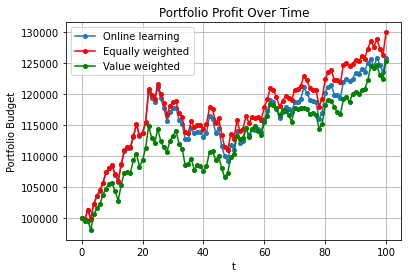

In [323]:
andamento = []
andamento_EW = []
andamento_VW = []
for t in range(0,len(stocks)-1):
    andamento.append(Portfolio.budget)
    #find new weights using hedge
    hedge.update_weights(Portfolio.weights,Portfolio.loss(t), learning_rate = Portfolio.eta)  
    hedge_weights = hedge.get_weights()
    
    #Check if the new weights don't exceed the cost budget and update the portfolio
    Portfolio.rebalance_portfolio(t=t,new_weights = hedge_weights,mode = "percentage",visualize = False)
    
    #Update dual player strategy
    ogd.update_lambda(p,Portfolio.tr)   
    Portfolio.Lambda = ogd.get_lambda()
    
    #ew update
    andamento_EW.append(EW.budget)

 
    #Check if the new weights don't exceed the cost budget and update the portfolio
    EW.rebalance_portfolio(time=t, mode = "percentage",visualize = False)
    
    
    #VW update
    andamento_VW.append(VW.budget)
 
 
    #Update the portfolio
    VW.rebalance_portfolio(time=t, mode = "percentage",visualize = False)
    
    

plt.plot([i for i in range(0,len(stocks)-1)], andamento, marker='o', linestyle='-',markersize = 4,label='Online learning')
plt.plot([i for i in range(0,len(stocks)-1)], andamento_EW, marker='o', linestyle='-',markersize = 4,color = "red",label='Equally weighted')
plt.plot([i for i in range(0,len(stocks)-1)], andamento_VW, marker='o', linestyle='-',markersize = 4,color = "green",label='Value weighted')



plt.xlabel('t')
plt.ylabel('Portfolio Budget')
plt.title('Portfolio Profit Over Time')
plt.grid(True)

plt.legend()

# Display the plot
plt.show()

In [333]:
EWSP100 = EquallyWeightedPortfolio(sp100_data)
PortfolioSP100 = OnlinePortfolioSelection(stock = sp100_data, returns = sp100returns,eta =0.1)
hedgeSP100 = HedgeAlgorithm(len(sp100_data.columns) )
ogdSP100 = OnlineGradientDescent(num_stocks = len(sp100_data.columns) , learning_rate = PortfolioSP100.eta )
VWSP100 = ValueWeightedPortfolio(sp100_data)

In [195]:
t =2
andamento.append(PortfolioSP100.budget)
#find new weights using hedge
hedgeSP100.update_weights(PortfolioSP100.weights,PortfolioSP100.loss(t), learning_rate = PortfolioSP100.eta)  
hedge_weights = hedgeSP100.get_weights()

#Check if the new weights don't exceed the cost budget and update the portfolio
PortfolioSP100.rebalance_portfolio(t=t,new_weights = hedge_weights,mode = "percentage")

#Update dual player strategy
ogdSP100.update_lambda(p,PortfolioSP100.tr)   
PortfolioSP100.Lambda = ogdSP100.get_lambda()

for time = 2 we had 71.0 transactions
The weights have been updated and the new cost budget is 993.3079881820679


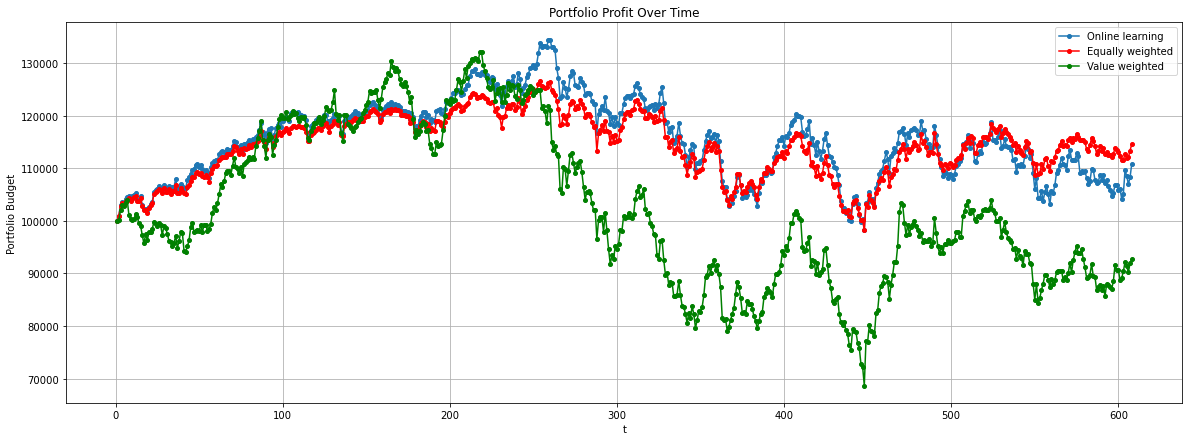

<Figure size 936x504 with 0 Axes>

In [334]:
andamento = []
andamento_EW = []
andamento_VW = []
p = PortfolioSP100.transaction_cost_budget / len(PortfolioSP100.stocks.columns)

for t in range(1,len(sp100_data)-1):
    andamento.append(PortfolioSP100.budget)
    #find new weights using hedge
    hedgeSP100.update_weights(PortfolioSP100.weights,PortfolioSP100.loss(t), learning_rate = PortfolioSP100.eta)  
    hedge_weights = hedgeSP100.get_weights()
    
    #Check if the new weights don't exceed the cost budget and update the portfolio
    PortfolioSP100.rebalance_portfolio(t=t,new_weights = hedge_weights,mode = "percentage",visualize = False)
    
    #Update dual player strategy
    ogdSP100.update_lambda(p,PortfolioSP100.tr)   
    PortfolioSP100.Lambda = ogdSP100.get_lambda()
    
    #ew update
    andamento_EW.append(EWSP100.budget)
    #find new weights using hedge
 
    #Check if the new weights don't exceed the cost budget and update the portfolio
    EWSP100.rebalance_portfolio(time=t, mode = "percentage",visualize = False)
    
    #VW update
    andamento_VW.append(VWSP100.budget)
 
 
    #Update the portfolio
    VWSP100.rebalance_portfolio(time=t, mode = "percentage",visualize = False)
    
    

plt.figure(figsize=(20, 7))

plt.plot([i for i in range(1,len(sp100_data)-1)], andamento, marker='o', linestyle='-',markersize = 4,label='Online learning')
plt.plot([i for i in range(1,len(sp100_data)-1)], andamento_EW, marker='o', linestyle='-',markersize = 4,color = "red",label='Equally weighted')
plt.plot([i for i in range(1,len(sp100_data)-1)], andamento_VW, marker='o', linestyle='-',markersize = 4,color = "green",label='Value weighted')



plt.xlabel('t')
plt.ylabel('Portfolio Budget')
plt.title('Portfolio Profit Over Time')
plt.grid(True)

plt.legend()

plt.figure(figsize=(13, 7))

# Display the plot
plt.show()

In [332]:
len(andamento)

608

In [218]:
PortfolioSP100.Lambda* p

0.16721311475409836

In [217]:
p = 1000/610

In [207]:
1/(100000/610)

0.0060999999999999995

In [148]:
((EWSP100.weights * sp100_data.iloc[0]).sum() - (EWSP100.weights * sp100_data.iloc[-1]).sum()) / (EWSP100.weights * sp100_data.iloc[0]).sum()

-0.06243201788349399

In [146]:
(0.06243201788349399 + 1 ) * 100000

106243.20178834941

In [152]:
PortfolioSP100.tr

0.0